<a href="https://colab.research.google.com/github/BlakeSRichardson/DS-3001/blob/main/Lab_4_BlakeRichardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** Blake Richardson

## **Computing ID:** jmw5jr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import ast

# Lab 4: Unsupervised Learning (100 Points)

In this lab, we will implement 2 models in the unsupervised learning family **K-means clustering** and **Principal Component Analysis (PCA)**.

You will utilize the skills you have gained over the semester to build, explore, and evaluate your models. As always, you will be graded on your model building and interpretation of  results rather than specific performance.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*h-lAg5H-ZNDRXxX2.png)

# **Part 1: K-Means Clustering (50 points)**

## For Part 1, you will pick from the following preloaded datasets:



In [3]:
pokemon_df = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")

In [ ]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Another option open to you, if you wish, is to  utilize a dataset of your choice (including your final project dataset).**


In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (5 points):**
## Read in your dataset as a Pandas DataFrame. Show the first 5 rows. How many rows and columns do you have?

## What are your features and their datatypes?

In [4]:
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemon_df.dtypes

,0
#,int64
Name,object
Type 1,object
Type 2,object
Total,int64
HP,int64
Attack,int64
Defense,int64
Sp. Atk,int64
Sp. Def,int64


**There is a total of 800 rows and 13 columns. The majority of columns are mostly int64, with the exception of columns, "Name", "Type 1", and "Type 2," which are object and, "Legendary," which is boolean.**

## **Question 2 (5 points):**
## Identify what percentage of each column has missing values and display this information (column name, percentage values missing) in a DataFrame.

## Then, fill in any missing values using any method appropriate for each column's data type and values.

In [6]:
missing_values = pokemon_df.isnull().mean() * 100
MV_df = pd.DataFrame({
    'Column': missing_values.index,
    'MissingPercentage': missing_values.values})
missing_values

,0
#,0.00
Name,0.00
Type 1,0.00
Type 2,48.25
Total,0.00
HP,0.00
Attack,0.00
Defense,0.00
Sp. Atk,0.00
Sp. Def,0.00


In [7]:
pokemon_df.fillna('', inplace=True)

## **Question 3 (5 points):**
## Identify columns in your DataFrame that need to be encoded and use the proper encoder for each feature to transform your categorical data into numerical features.

## In a sentence per each encoded feature, justify your choice in encoder and why you utilized it

In [8]:
pokemon_df.set_index('Name', inplace=True)
pokemon_df.drop (columns= ['#'], inplace=True)
pokemon_df = pd. get_dummies (pokemon_df, columns= ['Type 1', 'Type 2'])
pokemon_df['Legendary']=pokemon_df['Legendary'].astype(int)
pokemon_df.head(n=5)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1,0,False,...,False,False,False,False,False,True,False,False,False,False
Ivysaur,405,60,62,63,80,80,60,1,0,False,...,False,False,False,False,False,True,False,False,False,False
Venusaur,525,80,82,83,100,100,80,1,0,False,...,False,False,False,False,False,True,False,False,False,False
VenusaurMega Venusaur,625,80,100,123,122,120,80,1,0,False,...,False,False,False,False,False,True,False,False,False,False
Charmander,309,39,52,43,60,50,65,1,0,False,...,False,False,False,False,False,False,False,False,False,False


**1) I encoded feature, "Type 1" with one hot encoding because it allows me to convert object values into numeric binary values. This is best because it allows nominal data, or numeric values to correspond with qualitative data (in this case: true or false as to what type each pokemon is.                      
2) I encoded feature, "Type 2," with one hot encoding because it also has qualitative data that should be represented by numerical values (i.e. nominal data).          
3) I converted the feature, "Legendary," to integer because, although the values were numbers, its datatype was boolean. In this case as well, we are using numeric integer values to represent categorical data. This integer datatype formatting allows us to properly train models, which expect numerical data.**

## **Question 4 (5 points):**
## Finally, identify your numerical columns and apply both standardization and normalization.

## Display each numerical column name and its minimum and maximum values in a DataFrame after these 2 processes.

## In 2 to 3 sentences, summarize the DataFrame and the effects of your choice in standardization and normalization had on your numerical features? Why would scaling your data be beneficial for unsupervised learning?

In [9]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
numeric = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]
numeric = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]
for col in numeric:
    pokemon_df[f'{col}_Standardized'] = standard_scaler.fit_transform(pokemon_df[[col]])
    pokemon_df[f'{col}_Normalized'] = minmax_scaler.fit_transform(pokemon_df[[col]])
pokemon_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,...,Sp. Atk_Standardized,Sp. Atk_Normalized,Sp. Def_Standardized,Sp. Def_Normalized,Speed_Standardized,Speed_Normalized,Generation_Standardized,Generation_Normalized,Legendary_Standardized,Legendary_Normalized
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1,0,False,...,-0.239130,0.298913,-0.248189,0.214286,-0.801503,0.228571,-1.399637,0.0,-0.297381,0.0
Ivysaur,405,60,62,63,80,80,60,1,0,False,...,0.219560,0.380435,0.291156,0.285714,-0.285015,0.314286,-1.399637,0.0,-0.297381,0.0
Venusaur,525,80,82,83,100,100,80,1,0,False,...,0.831146,0.489130,1.010283,0.380952,0.403635,0.428571,-1.399637,0.0,-0.297381,0.0
VenusaurMega Venusaur,625,80,100,123,122,120,80,1,0,False,...,1.503891,0.608696,1.729409,0.476190,0.403635,0.428571,-1.399637,0.0,-0.297381,0.0
Charmander,309,39,52,43,60,50,65,1,0,False,...,-0.392027,0.271739,-0.787533,0.142857,-0.112853,0.342857,-1.399637,0.0,-0.297381,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,600,50,100,150,100,150,50,6,1,False,...,0.831146,0.489130,2.808099,0.619048,-0.629341,0.257143,1.611954,1.0,3.362691,1.0
DiancieMega Diancie,700,50,160,110,160,110,110,6,1,False,...,2.665905,0.815217,1.369846,0.428571,1.436611,0.600000,1.611954,1.0,3.362691,1.0
HoopaHoopa Confined,600,80,110,60,150,130,70,6,1,False,...,2.360112,0.760870,2.088973,0.523810,0.059310,0.371429,1.611954,1.0,3.362691,1.0


In [10]:
minmaxvalues_df = pd.DataFrame({
    'Column': [f'{col}_Standardized' for col in numeric] + [f'{col}_Normalized' for col in numeric],
    'Min Value': [pokemon_df[f'{col}_Standardized'].min() for col in numeric] +
                 [pokemon_df[f'{col}_Normalized'].min() for col in numeric],
    'Max Value': [pokemon_df[f'{col}_Standardized'].max() for col in numeric] +
                 [pokemon_df[f'{col}_Normalized'].max() for col in numeric]
})
minmaxvalues_df

,Column,Min Value,Max Value
0,Total_Standardized,-2.127839,2.876830
1,HP_Standardized,-2.674852,7.278632
2,Attack_Standardized,-2.281379,3.421972
3,Defense_Standardized,-2.209039,5.010829
4,Sp. Atk_Standardized,-1.920993,3.705602
5,Sp. Def_Standardized,-1.866223,5.684605
6,Speed_Standardized,-2.178804,3.846888
7,Generation_Standardized,-1.399637,1.611954
8,Legendary_Standardized,-0.297381,3.362691
9,Total_Normalized,0.000000,1.000000


**The methods I used to standardize and normalize my data caused the values of my data to range from -3 to -7, with most centered from -3 to 3. Standardization impacts the data by centering all the values around 0 with a standard deviation of 1, while normalizing scales all the values so that they are between 0 and 1 (thus, are more comparable in our model). This scaling of data is helpful for unsupervised learning because scaled data helps standardize the values used to train our models. This prevents less common, extreme values from interfering with the overall representative accuracy of the model.**

## **Question 5 (7 points):**
## Create a function to instantiate K-Means Clustering model with a user inputted parameter for "k" number clusters. Also tune a minimum of 3 hyperparameters of your choice, referencing documentation as necessary:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  


## Fit your model to your data, adding your predictions in a column of your DataFrame called cluster. Return this new dataframe in your function. Call your function on your data with k = 3.

In [11]:
def apply_kmeans_clustering(pokemon_df, k=3):
    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
        max_iter=300,
        init='k-means++',
        random_state=42)
    kmeans.fit(pokemon_df)
    pokemon_df['cluster'] = kmeans.predict(pokemon_df)
    return pokemon_df
ClusteredPokemon_df = apply_kmeans_clustering(pokemon_df, k=3)
ClusteredPokemon_df.head(n = 5)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,...,Sp. Atk_Normalized,Sp. Def_Standardized,Sp. Def_Normalized,Speed_Standardized,Speed_Normalized,Generation_Standardized,Generation_Normalized,Legendary_Standardized,Legendary_Normalized,cluster
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1,0,False,...,0.298913,-0.248189,0.214286,-0.801503,0.228571,-1.399637,0.0,-0.297381,0.0,0
Ivysaur,405,60,62,63,80,80,60,1,0,False,...,0.380435,0.291156,0.285714,-0.285015,0.314286,-1.399637,0.0,-0.297381,0.0,1
Venusaur,525,80,82,83,100,100,80,1,0,False,...,0.489130,1.010283,0.380952,0.403635,0.428571,-1.399637,0.0,-0.297381,0.0,1
VenusaurMega Venusaur,625,80,100,123,122,120,80,1,0,False,...,0.608696,1.729409,0.476190,0.403635,0.428571,-1.399637,0.0,-0.297381,0.0,2
Charmander,309,39,52,43,60,50,65,1,0,False,...,0.271739,-0.787533,0.142857,-0.112853,0.342857,-1.399637,0.0,-0.297381,0.0,0


## **Question 6 (5 points):**
## Write code to plot your predicted clusters, with different colors for different cluster numbers. Apply this code to the predictions you obtained in Question 5 and describe the output.

## In a minimum of 3 sentences, based on all the information you have, describe why k = 3 seems like a reasonable or unreasounable amount of clusters for your data.

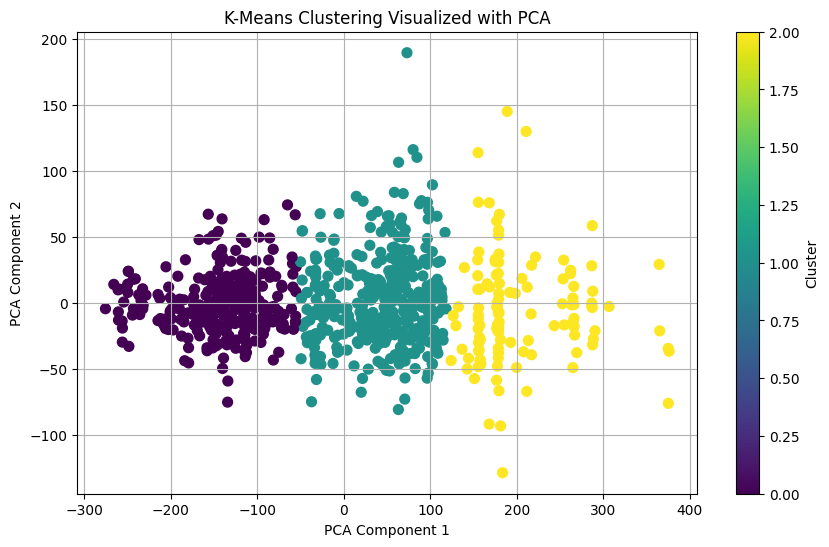

In [12]:
def plot_clusters(data, cluster_column='cluster'):
    pcadata = data.drop(columns=[cluster_column])
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(pcadata)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                          c=data[cluster_column], cmap='viridis', s=50)
    plt.title("K-Means Clustering Visualized with PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.show()
plot_clusters(ClusteredPokemon_df)

**I would argue k = 3 is a reasonable choice because the graph depicts that each of the 3 groups are relatively uniform in their plotting pattern (each colored group is in a relatively similar space). This suggests that each of the three groups must have consistently associated value patterns contributing to the purple, blue, and yellow groupings. Granted, seeing as some points are overlapping with the spaces of other colored groups, it would be beneficial to find more associations that would better distinguish the 3 groups from each other.**

## **Question 7 (8 points):**
## Plot an elbow plot for your clustering model with any metric of your choice and pick an optimal k value.

## Then, utilize the optimal k to tune at least 3 K-Means Clustering models by varying the hyperparameters. For each model, you will use the optimal k number of clusters you identified in your elbow plot but vary at least 3 other hyperparameters. Plot your predicted clusters differentiated by color.

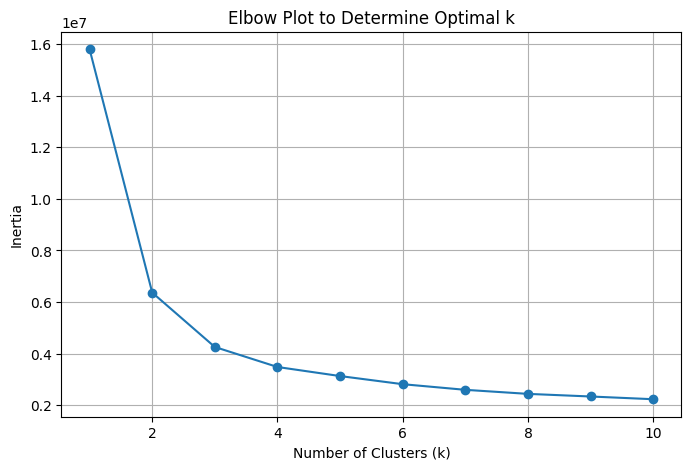

In [13]:
pokemonNOClUSTER_df = pokemon_df.drop(columns='cluster')
def plot_elbow(pokemonNOClUSTER_df, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        model = KMeans(n_clusters=k, n_init=10, max_iter=300, init='k-means++', random_state=42)
        model.fit(pokemonNOClUSTER_df)
        inertias.append(model.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title("Elbow Plot to Determine Optimal k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

plot_elbow(pokemonNOClUSTER_df, max_k=10)

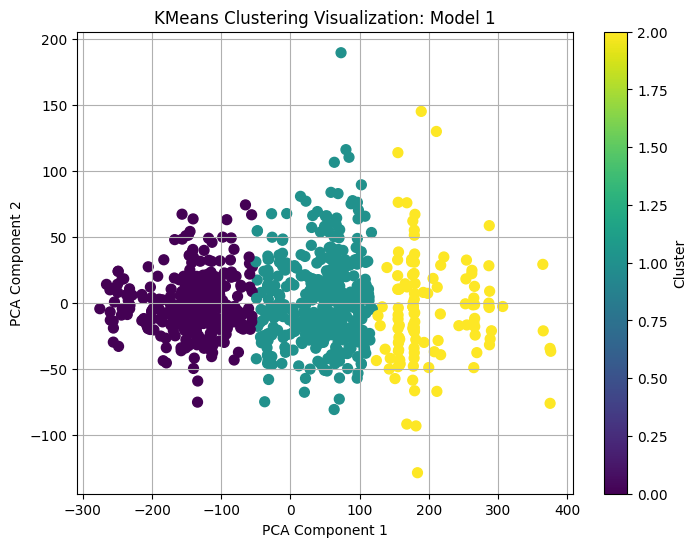

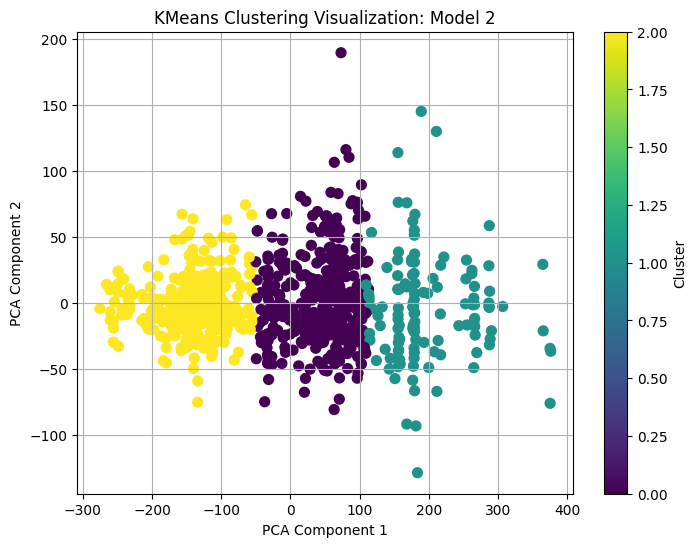

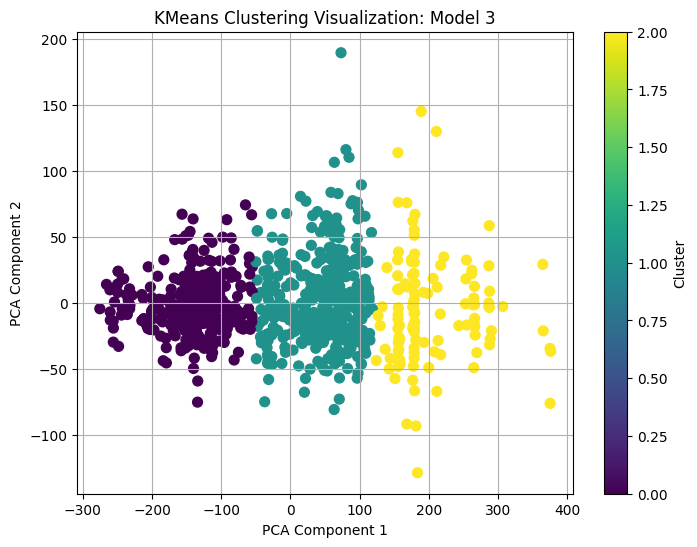

In [14]:

pokemonNOCLUSTER_df = pokemon_df.drop(columns='cluster')

def train_and_plot_kmeans(pokemonNOCLUSTER_df, k, init, n_init, tol, title=""):
    kmeans = KMeans(n_clusters=k, init=init, n_init=n_init, random_state=42, tol = tol)
    labels = kmeans.fit_predict(pokemonNOCLUSTER_df)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(pokemonNOCLUSTER_df)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"KMeans Clustering Visualization: {title}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.show()

train_and_plot_kmeans(pokemonNOCLUSTER_df, k=3, init='k-means++', n_init=10, tol = 1e-4,  title="Model 1")
train_and_plot_kmeans(pokemonNOCLUSTER_df, k=3, init='random', n_init=20, tol = 1e4, title="Model 2")
train_and_plot_kmeans(pokemonNOCLUSTER_df, k=3, init='k-means++', n_init=10, tol= 0, title="Model 3")


## In a minimum of 5 sentences, reflect on your tuned models. Write what you judge the optimal amount of clusters to be and why. How do the plots of your clusters change with tuning specific parameters? Do your results make sense?

**I picked a k of 3 clusters because our elbow graph shows that a cluster value of 3 has the most optimal balance between a too large of inertia and risk of overfitting. In terms of my tuned models, I found that one of the parameters most impactful in creating a visible distinctions between graphs was tolerance. Larger tolerance values (like in Model 2) resulted in shorter optimization periods causing points to overlap more (less distinction between groups), while the smallest tolerance value (in Model 3) had too much optimization time, causing overfitting. I believe it is also this overly large tolerance value of Model 2 that is causing the purple grouping to shift to the center of the plot (unlike in Model 1 and 3). This makes me believe that my Model 1 was most optimal in using k-mean++ with a moderate tolerance value that successfully distinguished groups without leading to noise and/or overfitting.**


## **Question 8 (10 points):**
## Now, examine the makeup of your clusters. Create plots and visualizations that may explain your initial groupings.

## You may do this by color coding your clusters by a given feature or by examining descriptive statistics of each cluster (ie: cluster 1 has an average temperature of 15 while cluster 2....)

## Write a **10 to 15 sentence** reflection on why you think your clusters have oriented the way they display. Are you clusters similar are very different in their feature makeup? Are you clusters similarly sized or are some much larger or smaller? Are there any aspects of the clusters that don't make sense when compared your original data or targets?




In [15]:
cluster_summary = ClusteredPokemon_df.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)

              Total         HP      Attack     Defense     Sp. Atk  \
cluster                                                              
0        303.895833  50.149306   53.954861   52.784722   47.854167   
1        472.966581  77.192802   85.300771   80.953728   77.544987   
2        622.569106  88.910569  117.723577  100.658537  116.333333   

            Sp. Def      Speed  Generation  Legendary  Type 1_Bug  ...  \
cluster                                                            ...   
0         49.493056  49.659722    3.315972   0.000000    0.107639  ...   
1         79.020566  72.953728    3.323907   0.000000    0.084833  ...   
2        101.861789  97.081301    3.341463   0.528455    0.040650  ...   

         Sp. Atk_Standardized  Sp. Atk_Normalized  Sp. Def_Standardized  \
cluster                                                                   
0                   -0.763438            0.205729             -0.805761   
1                    0.144487            0.367092    

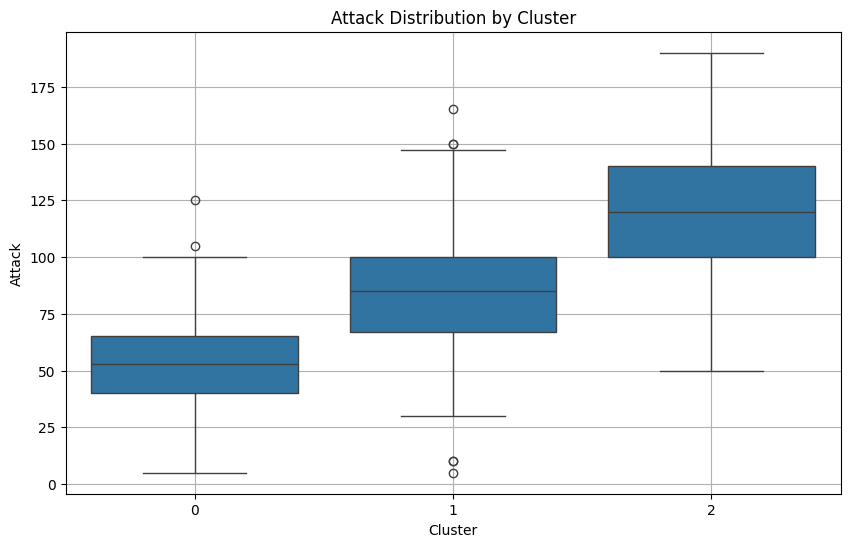

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ClusteredPokemon_df, x='cluster', y='Attack')
plt.title("Attack Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Attack")
plt.grid(True)
plt.show()

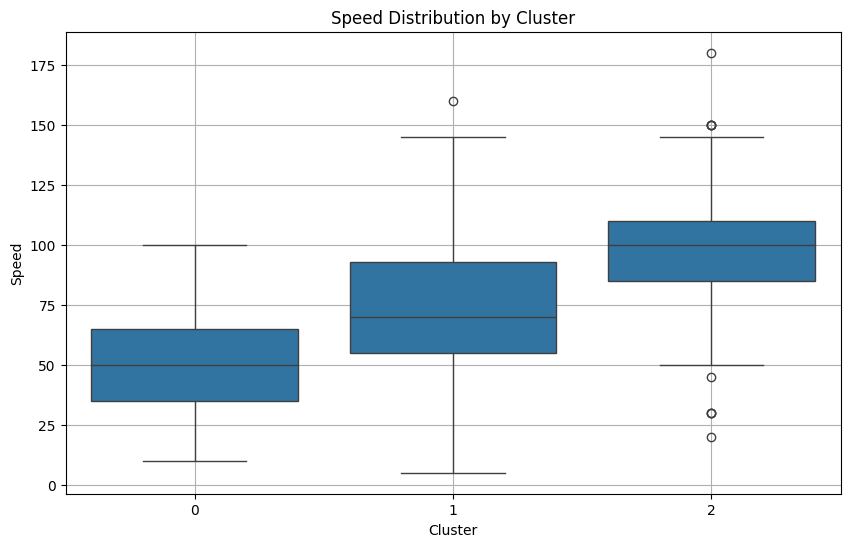

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ClusteredPokemon_df, x='cluster', y='Speed')
plt.title("Speed Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Speed")
plt.grid(True)
plt.show()

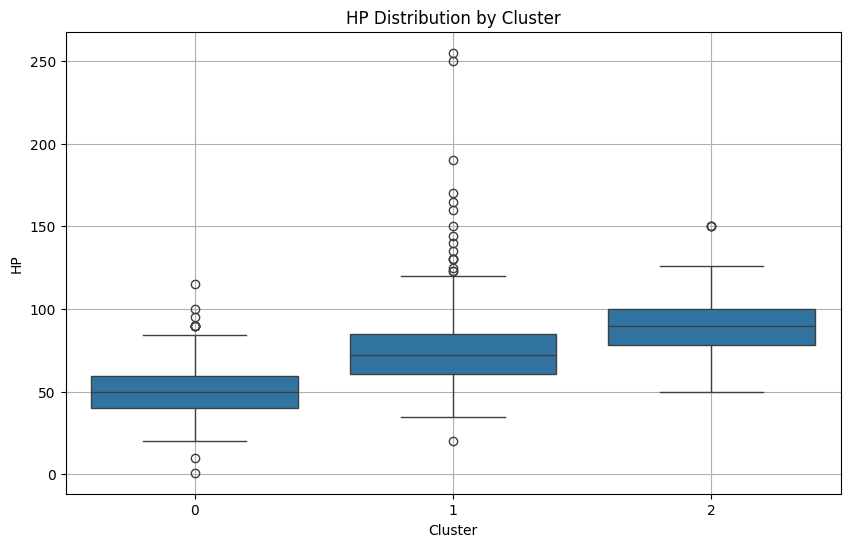

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ClusteredPokemon_df, x='cluster', y='HP')
plt.title("HP Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("HP")
plt.grid(True)
plt.show()

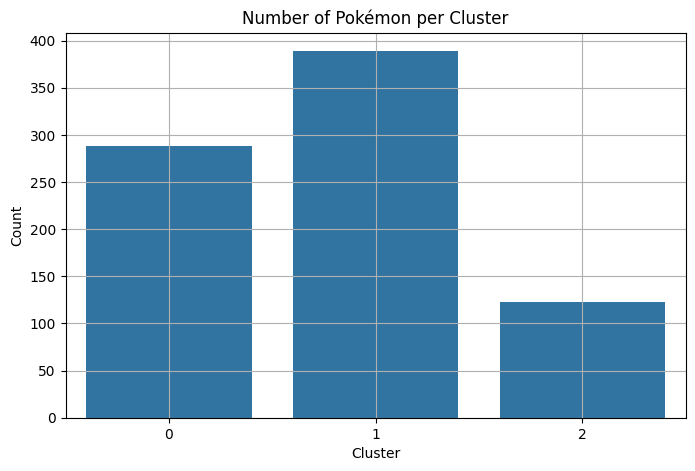

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=ClusteredPokemon_df, x='cluster')
plt.title("Number of Pokémon per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.grid(True)
plt.show()

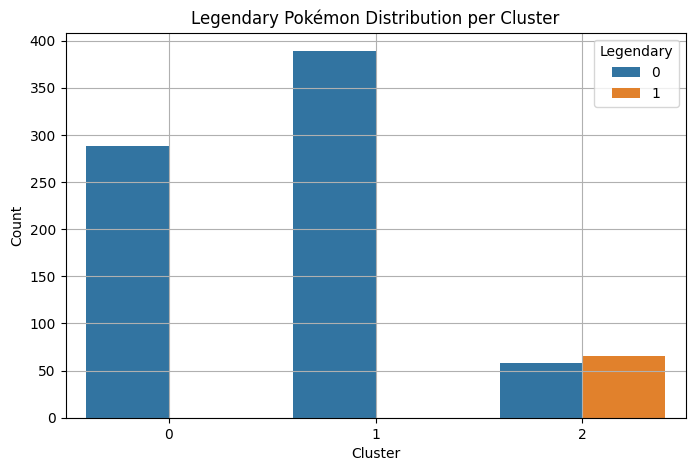

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=ClusteredPokemon_df, x='cluster', hue='Legendary')
plt.title("Legendary Pokémon Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.grid(True)
plt.show()

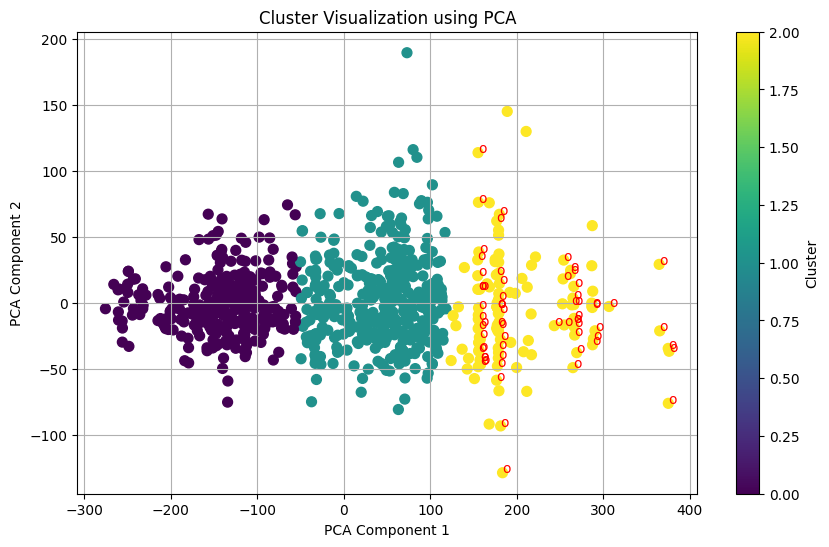

In [21]:
plt.figure(figsize=(10, 6))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ClusteredPokemon_df.drop(columns='cluster'))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=ClusteredPokemon_df['cluster'], cmap='viridis', s=50)
plt.title("Cluster Visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')

legendary = ClusteredPokemon_df['Legendary'].values
for i in range(len(legendary)):
    if legendary[i] == 1:
        plt.text(pca_result[i, 0], pca_result[i, 1], 'o', fontsize=10, color='red')

plt.grid(True)
plt.show()

**My clusters appear to be relatively different in feature makeup because of the wide range of variance in Pokemons. For example, cluster 0 tends to have lower average values in offensive actions(total, attack, speed, and HP) than cluster 2, which has significantly higher values in these same domains (offensive actions: total, attack, speed, and HP). This suggests that there is a significant pattern of differences in Pokemon capabilities, especially between Cluster 0 and Cluster 1. Additionally, we can see that cluster 2 has the highest average values in all offensive capabilities across the board. At first glance, this might be considered strange, as our bar plot depicts Cluster 2 as having the fewest number of Pokemons when compared to other clusters. However, this phenomenon can be explained by the fact that Cluster 2 contains rarer Pokemons (specifically with distinctively more powerful offensive capabilities). This is depicted by the graph, showing that only Cluster 2 contains Legendary (more powerful, less common) Pokemons.
Our PCA cluster visualization graph further supports and summarizes these findings. Each of the 3 colored clusters are grouped relatively distinctively within their plot location. Yet, there is some slight overlapping amongst points, most noticeably clusters 0 and 1. This indicates that quite a few Pokemons share similar capability values to each other in clusters 0 and 1. In contrast, the yellow (cluster 2) group is much more secluded from cluster 0 and 1 due to its containment of fewer, but more powerful and uniquely capable Pokemon.**







# **Part 2: Principal Component Analysis (50 Points)**

## **Question 1 (15 points):**
## Fit a PCA model to a dataset if your choice. Write code to visualize the first 2 principal components and color code your groups to differentiate them.



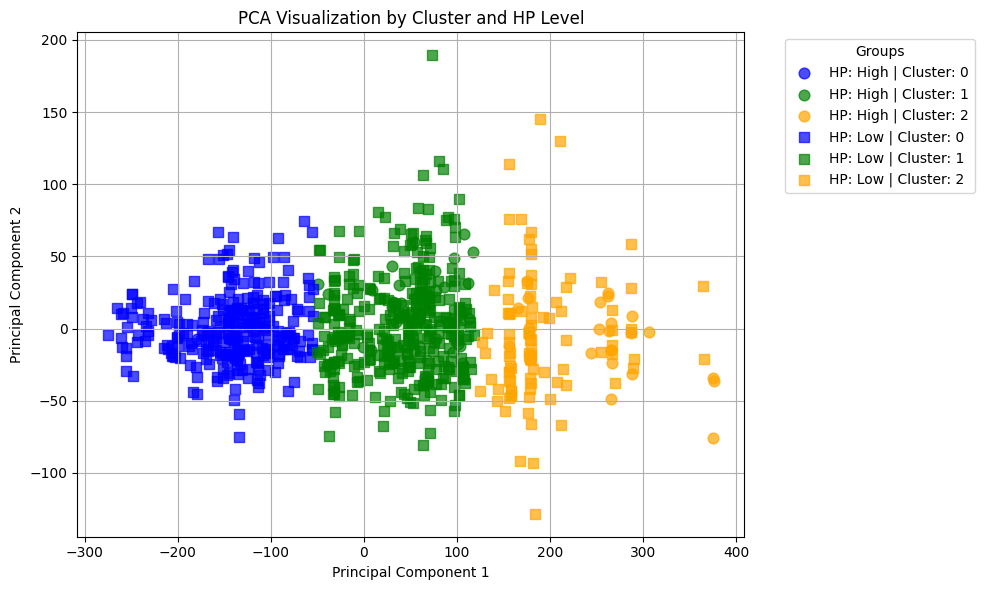

In [ ]:
PokemonPCA_df = ClusteredPokemon_df.drop(columns=['Legendary', 'cluster', 'HP_Level'])
pca = PCA(n_components=2)
pca = pca.fit_transform(PokemonPCA_df)
PokemonPCA = pd.DataFrame(data=pca, columns=['PCA1', 'PCA2'])
PokemonPCA['Cluster'] = ClusteredPokemon_df['cluster'].values
PokemonPCA['HP_Level'] = ClusteredPokemon_df['HP_Level'].values

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange']
markers = {'High': 'o', 'Low': 's'}
for hp_level in ['High', 'Low']:
    for cluster in sorted(PokemonPCA['Cluster'].unique()):
        filtered = PokemonPCA[(PokemonPCA['HP_Level'] == hp_level) & (PokemonPCA['Cluster'] == cluster)]
        plt.scatter(filtered['PCA1'], filtered['PCA2'],
                    c=colors[cluster],
                    marker=markers[hp_level],
                    s=60, alpha=0.7,
                    label=f'HP: {hp_level} | Cluster: {cluster}')

plt.title("PCA Visualization by Cluster and HP Level")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Question 2 (10 points):**
## Create 2 barplots:

*   The first barplot should show the percentage variance explained by each principal component

* The first barplot should show the **cumulative** percentage variance explained by each principal component. Add a horizontal red line on this graph depicting when the cumulative variance has hit 80%.


## Write 2 to 3 sentences on how many components explain 80% of the variability in your dataset. Are the results surprising given how much variance is in (or not in) your data? What features would you consider dropping based on your results and why?


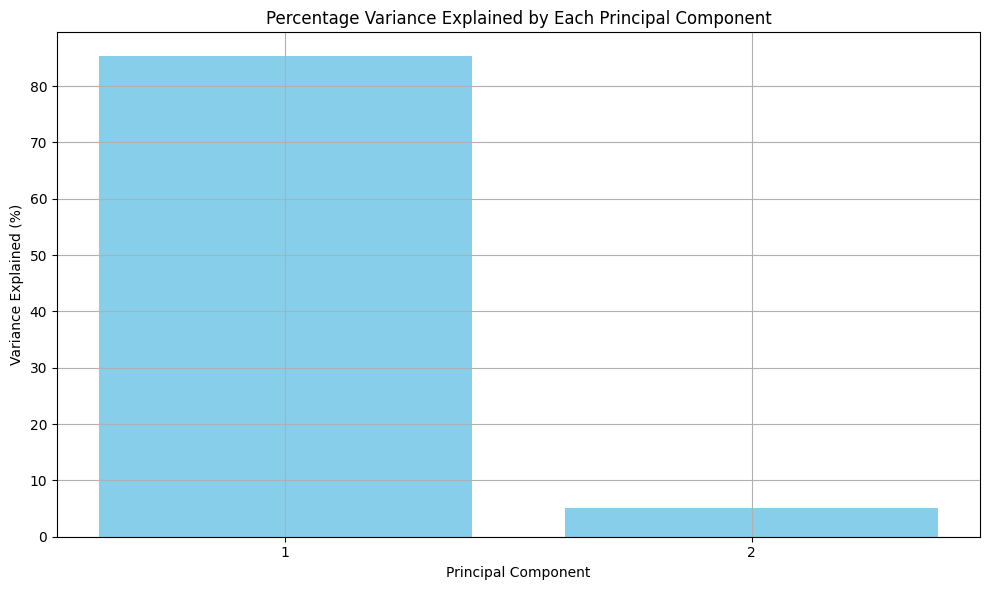

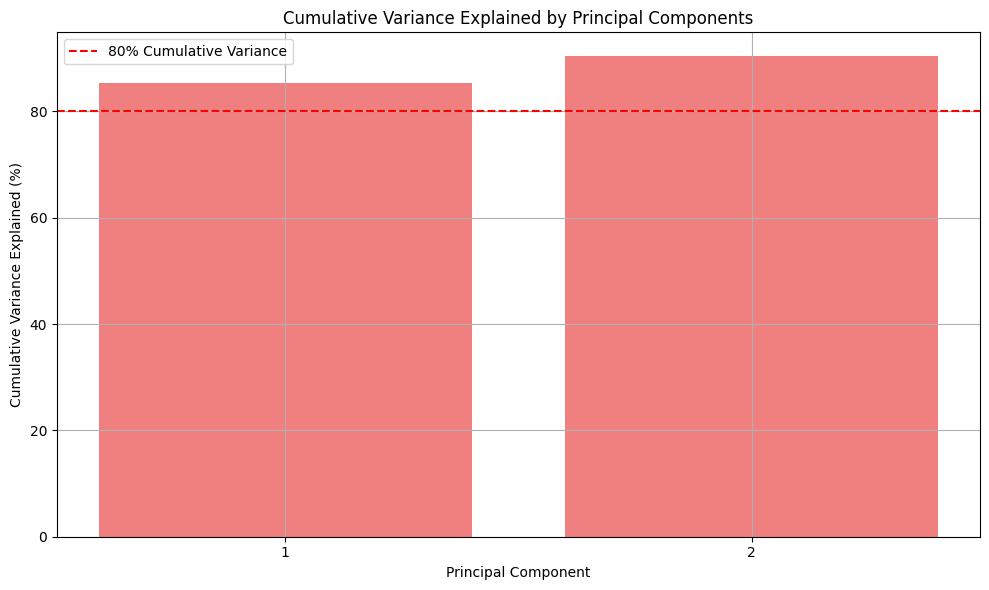

In [ ]:
pca = PCA(n_components=2)
pca.fit(PokemonPCA_df)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_ * 100, color='skyblue')
plt.title("Percentage Variance Explained by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, color='lightcoral')
plt.axhline(y=80, color='red', linestyle='--', label="80% Cumulative Variance")
plt.title("Cumulative Variance Explained by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained (%)")
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Our graph shows only the first principal component is required to explain 80% of cumulative variance in my data. This is quite surprising considering the large number of feature columns my Pokemon dataframe contains. These findings can be explained by the idea that there is strong correlation in patterns amongst each grouping, thus requiring fewer components to properly group. Overall, I would consider dropping the, "Total," column because it is basically a total count of all capability values already being interpreted independently.**

## **Question 3 (25 points):**
## Write **3 paragraphs**, supported by code and exploratory analysis, explaining and exploring the groupings you see in your data. Utilize data features to justify why the components that explain so much of the variance in your data are reasonable. Explain what kind of applications or decision making your analysis can help support.

## You may choose to explore beyond simply the first 2 principal components if you wish.



**The principal components show that my Pokémon dataset's variability can be sufficiently explained by just the first principal component. My PCA visualization displays this idea, with the first two principal components showing the three clusters grouped by cluster and HP level characteristics. Through the different colored groupings and markers signifying HP level, we can see that each group is quite distinct in cluster color (not the HP level marker) from each other. There is still some overlapping, suggesting that we could continue to seek ways to further identify correlation patterns to distinguish between clusters. But, overall, these graphs support the idea that each cluster tends to contain Pokémon of similar offensive/defensive features. For example, in previous exploratory analysis, we found that Cluster 0 and 1 tended to have relatively similar values of offensive skills, with Cluster 1 having slightly higher values across all individual graphs. Meanwhile, Cluster 2 demonstrated the significantly highest values despite having the smallest number of Pokémon, supporting the idea that its few Pokémon’s distinguishing characteristics were more unique (with Legendary Pokémon of Cluster 2 containing significantly larger offensive skill values than Pokémon in Clusters 1 and 0).**

**The PCs responsible for explaining the majority of variance prove that the first principal component alone accounts for about 80% of the cumulative variance in our data. Both the individual variance and cumulative variance bar plot confirm that the initial, single component encompasses the majority of information found across all data features. This further supports our findings from the PCA visualization: all features of the Pokémon dataset (Total, Attack, Speed, HP, etc.) are highly interrelated, with relatively clear correlational patterns for cluster categorization. Furthermore, the remaining 20% variance captured by the second principal component most likely accounts for smaller, more intricate differences in correlational values between clusters.**

**These results have real-world application in that they allow for more strategic methods of collecting and playing Pokémon. Our findings prove that there are significant correlational patterns between Pokémon of certain offensive/defensive skill value. Thus, someone who is aiming to collect Pokémon with certain strength values could use these patterns to identify the strongest combined lineups of Pokémon. Additionally, Pokémon producers and sellers can use this information to correctly market certain Pokémon to certain tiers of consumers. For example, Pokémon in Cluster 2 (uniquely powerful, “Legendary” characters) should be marketed towards older individuals with expertise, while Pokémon in Cluster 1 would be best for young children not yet aware of certain cards' value.**

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment. **- Blake Richardson**